<a href="https://colab.research.google.com/github/Julymusso/Trab_BD1_2021_Barbearia_Gourmet/blob/master/BD1_Relatorios_BarbeariaGourmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [3]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### Importando bibliotecas

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Usando psycopg2 para configurar conexão

In [5]:
conn = psycopg2.connect(host="fanny.db.elephantsql.com", database="dcekjmnn", user="dcekjmnn", password="jlWxlcP-vQKVJap5lBFaN2XfqjHWpd1F")

# Relatórios

## Relatório 1
### Objetivo: Obter relatório que mostre o nome e o cargo de cada funcionário(a) e a quantidade de atendimentos realizados durante o mês de Dezembro.
Código para obtenção do resultado:

In [9]:
funcionario = pd.read_sql_query("""select pessoa.nome, pessoa.sobrenome, funcionario.cargo, count(pessoa.nome) as quantidade_atendimento_mes
from pessoa
join funcionario on (funcionario.fk_pessoa_id_pessoa = pessoa.id_pessoa)
join ordem_servico on (ordem_servico.data >= '2021-12-01' and ordem_servico.data <= '2021-12-31')
where pessoa.id_pessoa = funcionario.fk_pessoa_id_pessoa
group by pessoa.nome, pessoa.sobrenome, funcionario.cargo
""", conn)
funcionario

,nome,sobrenome,cargo,quantidade_atendimento_mes
0,Arthur,Daniel Oliveira,Depilador,186
1,Benjamin,Pedro Victor Caldeira,Depilador,186
2,Danilo,Márcio Carlos Eduardo Alves,Manicure,186
3,Enrico,Edson Marcelo Costa,Manicure,186
4,Enzo,Roberto Danilo Gomes,Cabeleleiro,186
5,Erick,Thomas Melo,Cabeleleiro,186
6,Felipe,Thomas Luís Ramos,Cabeleleiro,186
7,Giovanni,Roberto Bento Sales,Cabeleleiro,186
8,Henrique,Hugo Ian da Mota,Cabeleleiro,186
9,Igor,Cláudio Pedro Barros,Cabeleleiro,186


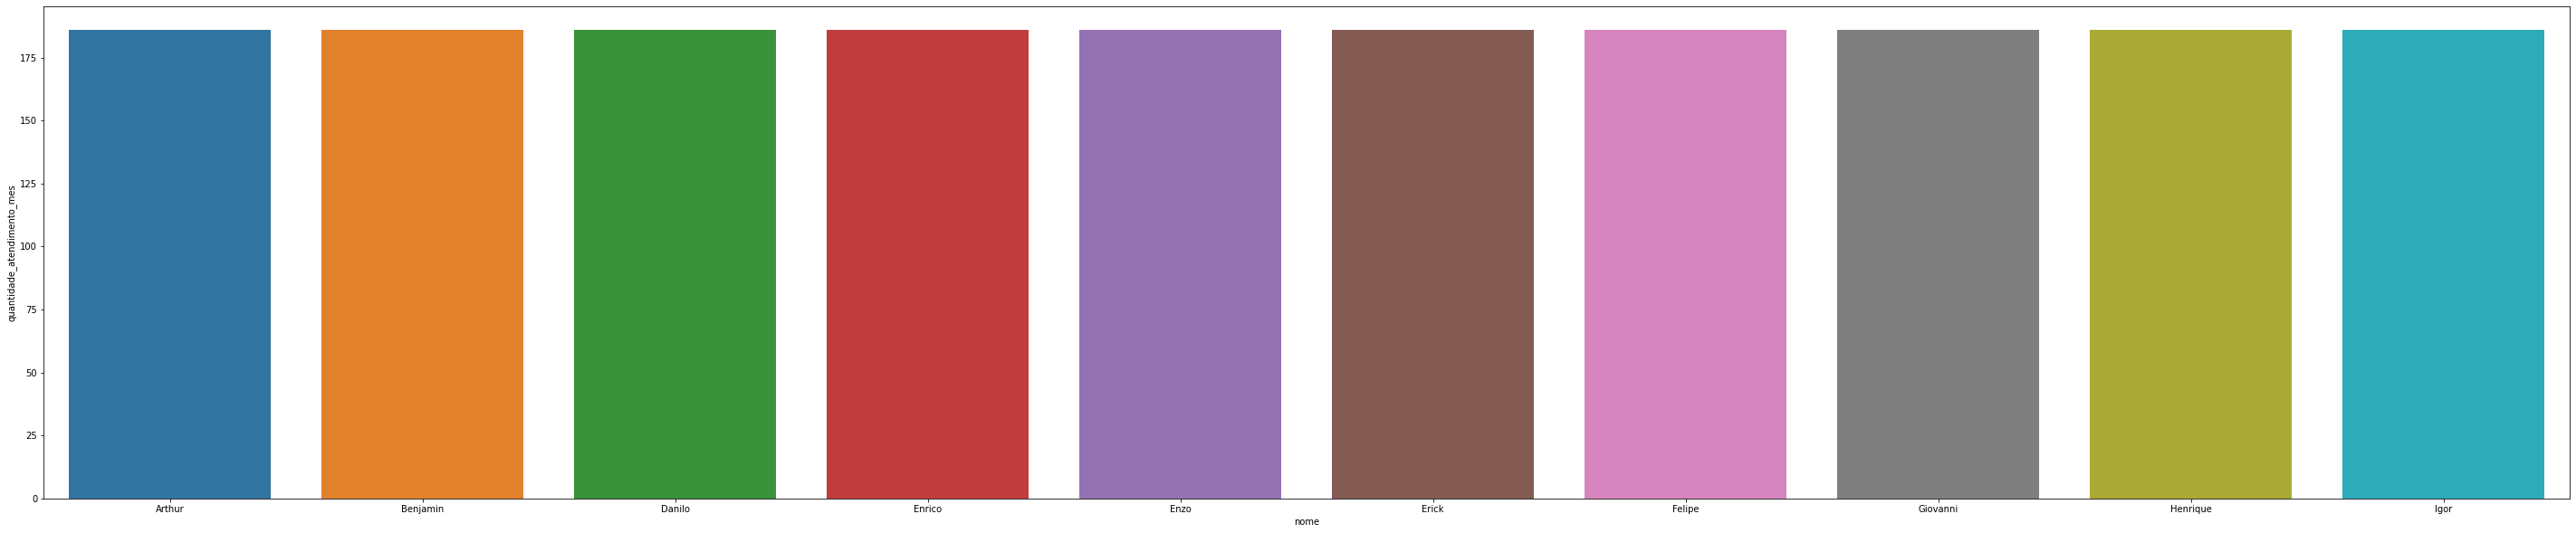

In [11]:
plt.figure(figsize=(50,10));
sns.barplot(x='nome', y='quantidade_atendimento_mes',data=funcionario);

# ==========================================================================================
## Relatório 2
### Objetivo: Obter relatório que mostre o nome de cada serviço e a quantas vezes eles foram solicitados no último trimestre do ano de 2021.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""select servico.tipo_servico, ordem_servico.data, count(servico.tipo_servico) as qtd_solicitacoes_mes
from servico as servico
join ordem_servico on (ordem_servico.data is not null)
where ordem_servico.data >= '2021-09-01' and ordem_servico.data <= '2021-12-31'
group by servico.tipo_servico, ordem_servico.data
order by ordem_servico.data 
 """, conn)
res

,tipo_servico,data,qtd_solicitacoes_mes
0,Pé e Mão,2021-09-01,1
1,Alisamento,2021-09-01,1
2,Corte de cabelo 6,2021-09-01,1
3,Depilação 4,2021-09-01,1
4,Depilação 2,2021-09-01,1
...,...,...,...
1703,Depilação 3,2021-12-31,4
1704,Depilação 4,2021-12-31,4
1705,Pé,2021-12-31,4
1706,Corte de cabelo 1,2021-12-31,4


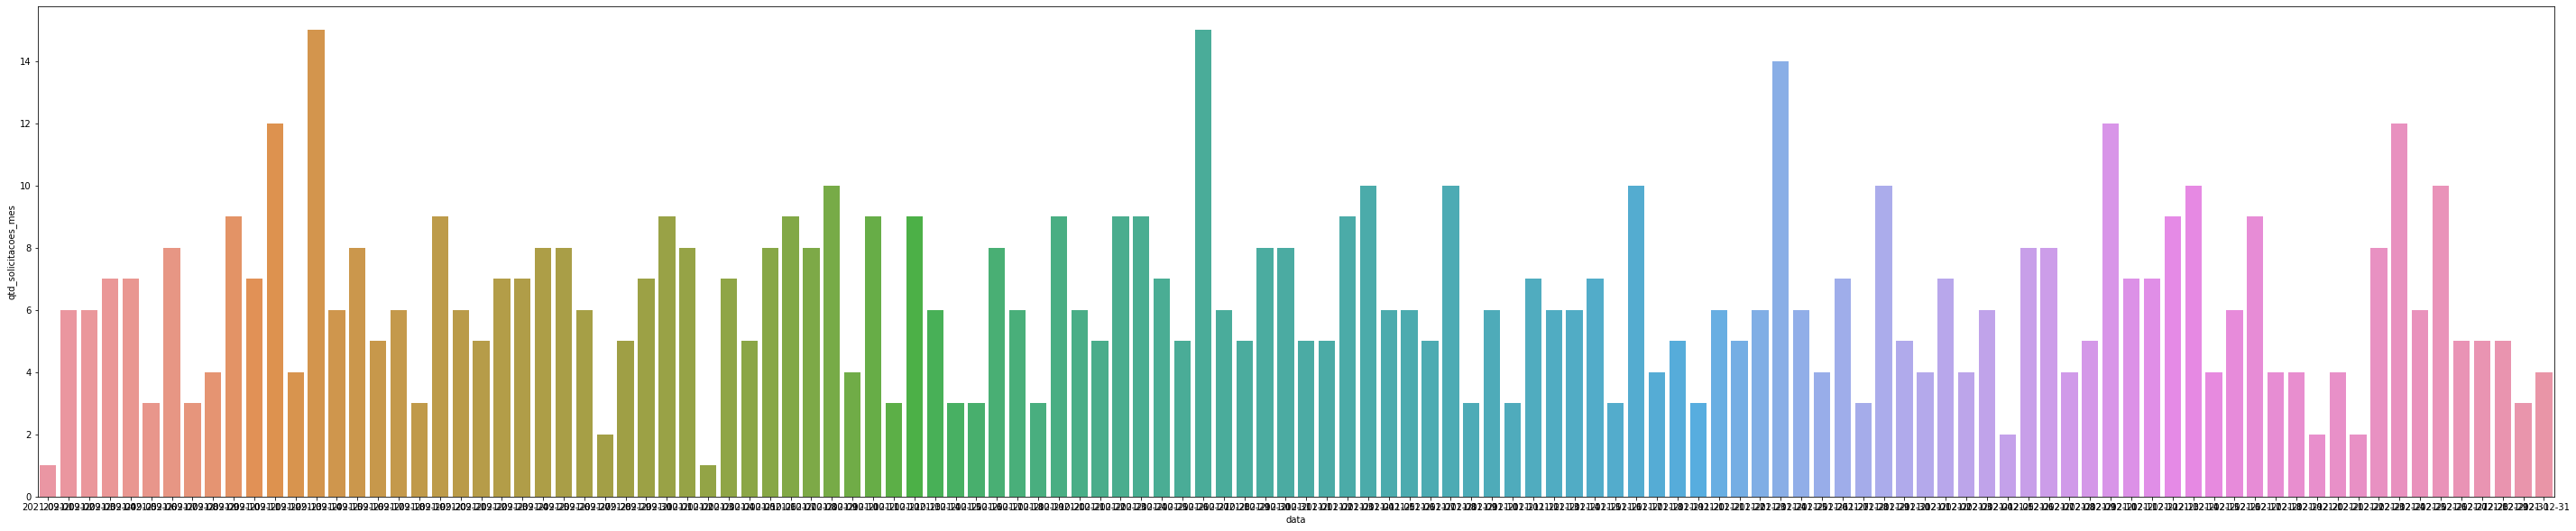

In [ ]:
plt.figure(figsize=(50,10));
sns.barplot(x='data', y='qtd_solicitacoes_mes', data=res);


# ============================================================
## Relatório 3
### Objetivo: Obter relatorio que mostre o nome do funcionário, cpf e a soma do valor dos serviços realizados na empresa, ou seja, mostra o funcionário mais lucrativo no 4º trimestre.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""select pessoa.nome as funcionario, pessoa.cpf, sum(servico.valor) as valor_total
from pessoa as pessoa
join servico on (servico.id_servico = pessoa.id_pessoa)
join ordem_servico on (ordem_servico.fk_pessoa_id_pessoa = servico.id_servico)
join funcionario on (funcionario.cargo is not null)
where ordem_servico.data >= '2021-09-01' and ordem_servico.data <= '2021-12-31' 
group by pessoa.nome, pessoa.cpf
order by valor_total desc
""",conn)
res

,funcionario,cpf,valor_total
0,Vinicius,500.944.857-20,2700.0
1,Vicente,485.717.007-88,800.0
2,Rafael,830.164.537-70,500.0
3,Kevin,179.019.247-13,250.0


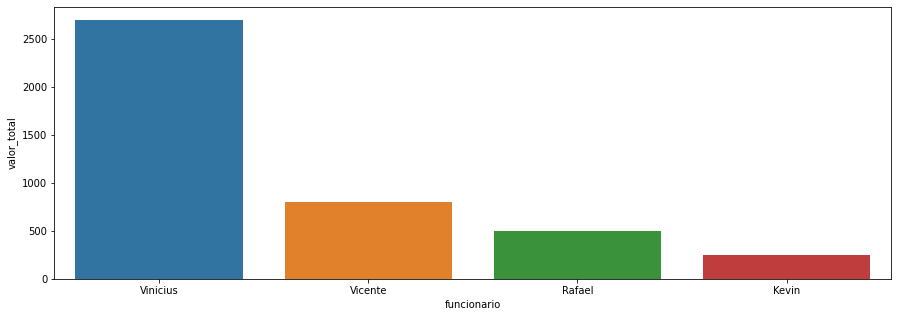

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x='funcionario',y='valor_total',data=res,);

# ============================================================
## Relatório 4
### Objetivo: Obter Relatório que mostre as informações dos municípios e a quantidade de cliente por região.

Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""select endereco.cidade, count(pessoa.id_pessoa) as total_clientes
from endereco
join pessoa on (pessoa.fk_endereco_id_endereco = endereco.id_endereco)
group by endereco.cidade
order by total_clientes DESC
""", conn)
res

,cidade,total_clientes
0,Vila Velha,120
1,Serra,120
2,Vitória,90
3,Cariacica,60
4,Viana,30
5,Guarapari,20
6,Cachoeiro de Itapemirim,15
7,Aracruz,15


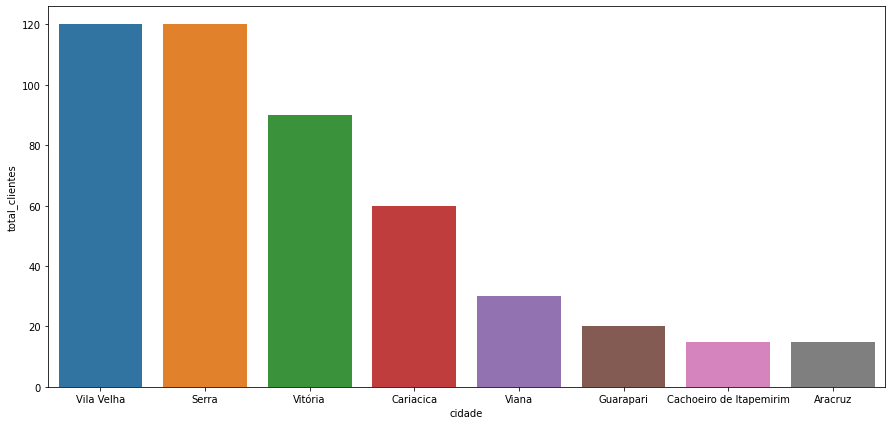

In [ ]:
plt.figure(figsize=(15,7));
sns.barplot(x = 'cidade', y = 'total_clientes', data=res,);

# ============================================================
## Relatório 5
### Objetivo: Informar nome, cpf e total dos 10 clientes mais assíduo na barbearia.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query(""" SELECT DISTINCT pessoa.nome, pessoa.sobrenome, pessoa.cpf, count(ordem_servico.fk_pessoa_id_pessoa) as frequência
from pessoa as pessoa
inner join ordem_servico on (ordem_servico.fk_pessoa_id_pessoa=pessoa.id_pessoa)
where ordem_servico.status='Executado'
group by pessoa.nome, pessoa.sobrenome, pessoa.cpf
order by frequência desc
limit 10""", conn)
res

,nome,sobrenome,cpf,frequência
0,Julio,Bento Ribeiro,559.512.137-89,10
1,Carlos,Francisco Arthur da Mata,904.024.967-95,9
2,Martin,Otávio Noah Corte Real,196.835.217-11,9
3,Rebeca,Brenda Castro,797.762.287-47,8
4,Ian,Thales Costa,156.090.287-60,8
5,Diego,Sérgio Aparício,354.058.547-86,7
6,Raul,Luan Yuri Rodrigues,996.493.637-00,7
7,Ryan,Guilherme Márcio Cavalcanti,119.848.187-08,7
8,Miguel,Bento da Cruz,942.741.167-86,7
9,Martin,Diogo Melo,220.405.947-10,7


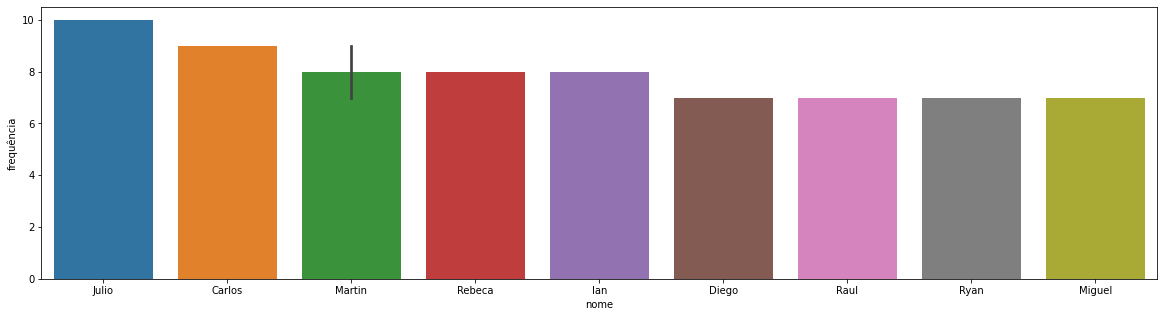

In [ ]:
plt.figure(figsize=(20,5));
sns.barplot(x='nome',y='frequência', data=res);